<a href="https://colab.research.google.com/github/SilverQ/dl_study/blob/master/Udacity/Lesson3_Fashion_MNIST_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
tf.logging.set_verbosity(tf.logging.ERROR)
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)       # 1.13.1
tf.enable_eager_execution()

1.13.1


In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Explorer the data
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print('Number of training examples: {}'.format(num_train_examples))
print('Number of testing examples: {}'.format(num_test_examples))

Number of training examples: 60000
Number of testing examples: 10000


In [0]:
# Preprocess the data(normalize)
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels


# train_dataset = train_dataset.map(normalize)
# test_dataset = test_dataset.map(normalize)

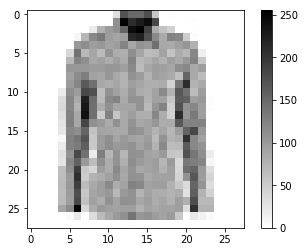

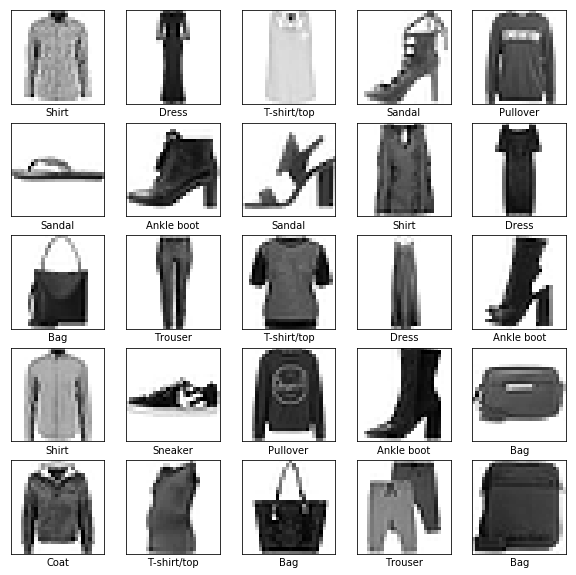

In [7]:
# Explorer the progressed data
# Take a single image and remove the color dimension
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10, 10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28, 28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [0]:
# Build a model only with fully connected layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu, padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
#     tf.keras.layers.Dense(512, activation=tf.nn.softmax),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
# Compile the model
# opt = tf.keras.optimizers.SGD(lr=0.1, decay=0.000225, momentum=0.5)
opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# train the model
batch_size = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

model.fit(train_dataset, epochs=1, steps_per_epoch=math.ceil(num_train_examples/batch_size))

1875/1875 [==============================] - 30s 16ms/step - loss: 14.4930 - acc: 0.1004


In [11]:
# Evaluate accuracy
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/batch_size))
print('Accuracy on testset: {}'.format(test_accuracy))

# Make predictions and explore
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)
print(predictions.shape)
print(predictions[0])
'''
(32, 10)
[9.9332246e-04 3.0070751e-07 5.4520708e-02 5.4992433e-03 5.0916857e-01
 4.4711786e-08 4.2935511e-01 2.3336844e-08 4.6259694e-04 3.6422879e-08]
'''

313/313 [==============================] - 2s 5ms/step - loss: 14.5073 - acc: 0.1000
Accuracy on testset: 0.10000000149011612
(32, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


'\n(32, 10)\n[9.9332246e-04 3.0070751e-07 5.4520708e-02 5.4992433e-03 5.0916857e-01\n 4.4711786e-08 4.2935511e-01 2.3336844e-08 4.6259694e-04 3.6422879e-08]\n'

In [12]:
print(np.argmax(predictions[0]))
print(test_labels[0])

8
6


In [0]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_labels:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:0.2f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_labels]), color=color)

In [0]:
def plot_value_array(i, predictions_array, true_labels):
    predictions_array, true_labels = predictions_array[i], true_labels[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_labels].set_color('blue')

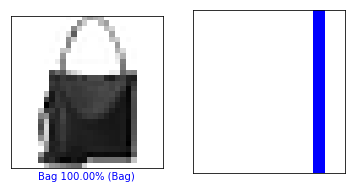

In [0]:
i = 10
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

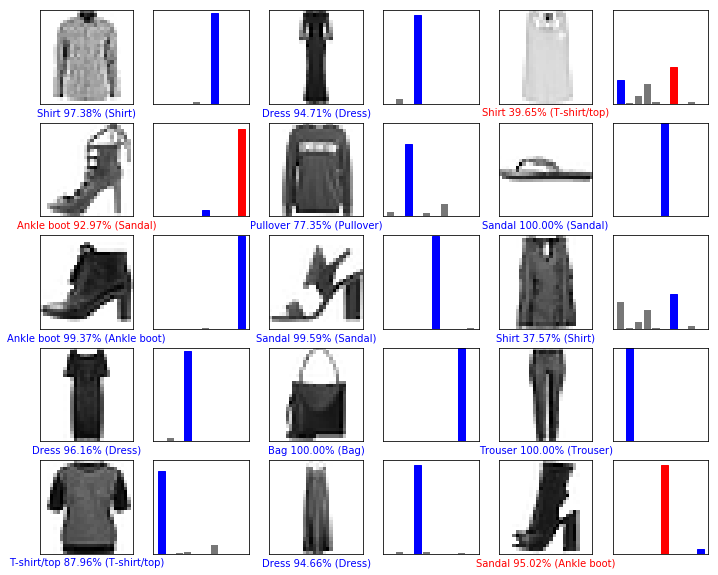

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [0]:
img = test_images[0]
print(img.shape)

img = np.array([img])
print(img.shape)

(28, 28, 1)
(1, 28, 28, 1)


[[4.6022248e-04 1.2268484e-09 3.0108171e-03 2.3513643e-05 2.2406077e-02
  1.4800674e-13 9.7381455e-01 1.1737234e-20 2.8481442e-04 5.1012754e-15]]


6

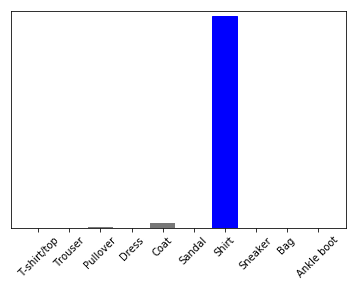

In [0]:
prediction_single = model.predict(img)
print(prediction_single)

plot_value_array(0, prediction_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(prediction_single[0])

# Exercises
Experiment with different models and see how the accuracy result differ. In particular change the following parameters:
  * Set training epochs set to 1
  * Number of neurons in the Dense layer following the Flatten One.For example, go really low (e.g.10) in ranges up to 512 and see how accuracy changes
  * Add additional Dense layers between the Flatten and final Dense(10, activation=tf.nn.softmax), Experiment with different units in these layers
  * Don't normalize the pixel values, and see the effect that has

Remember to enable GPU to make everything run faster (Runtime -> Change runtime type -> Hardware accelerator -> GPU). Also, if you run into trouble, simply reset the entire environment and start from the beginning:
  * Edit -> Clear all outputs
  * Runtime -> Reset all runtimes
  

# Result


1.   Set training epoch 1 : accuracy 88.62%
2.   Reduce Dense layer : accuracy 89.68%
3. Add One Dense layer with Softmax activation function : accuracy 10.00%
4. Don't normalize(from ex1) : accuracy 10.00%

